<a href="https://colab.research.google.com/github/Triyas27/EDA/blob/main/21BDS0016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory Digital Assignment-Phase 1
### Faculty: Prakash M
### Name: Triyas Pradhan
### Reg.no: 21BDS0016
### Dataset: https://github.com/Triyas27/EDA/blob/main/crimedata.xlsx
### colab link: https://colab.research.google.com/drive/12otWMgZygzEvk5YJPmuumcvYG9x20mvyscrollTo=ojclN-bEyKfj
### Github link: https://github.com/Triyas27/EDA/blob/main/21BDS0016.ipynb

# Module 1

Summary statistics for numerical data:
         rownames     county        year      crmrte      prbarr     prbconv  \
count  630.000000  630.00000  630.000000  630.000000  630.000000  630.000000   
mean   315.500000  100.60000   84.000000    0.031588    0.307368    0.688618   
std    182.009615   58.03627    2.001589    0.018121    0.171205    1.690345   
min      1.000000    1.00000   81.000000    0.001812    0.058824    0.068376   
25%    158.250000   51.00000   82.000000    0.018352    0.217902    0.347692   
50%    315.500000  103.00000   84.000000    0.028441    0.278240    0.474375   
75%    472.750000  151.00000   86.000000    0.038406    0.352518    0.635597   
max    630.000000  197.00000   87.000000    0.163835    2.750000   37.000000   

          prbpris      avgsen       polpc     density  ...       lwfir  \
count  630.000000  630.000000  630.000000  630.000000  ...  630.000000   
mean     0.425518    8.954540    0.001917    1.386062  ...    5.579433   
std      0.087245 

<ipython-input-2-ec59ffa29f5d>:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


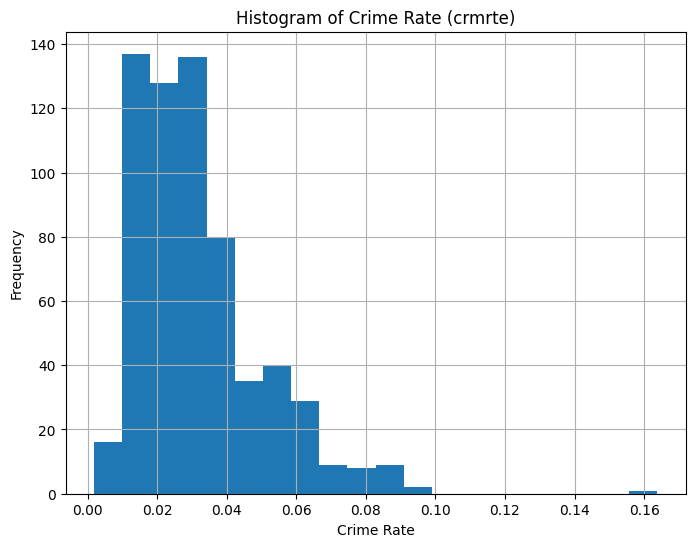


Value counts for 'county' column (Nominal scale example):
county
1      7
151    7
147    7
145    7
143    7
      ..
63     7
61     7
59     7
57     7
197    7
Name: count, Length: 90, dtype: int64

First 5 rows with 'crime_level' (Ordinal scale example):
     crmrte crime_level
0  0.039885        high
1  0.038345        high
2  0.030305      medium
3  0.034726        high
4  0.036573        high

T-test: t-stat = 2.1990263292594343, p-value = 0.028239311431950107

Software Tools for EDA:
Python: Pandas, Seaborn, Matplotlib
R: GGPlot2, dplyr, tidyr
Excel/Tableau: For basic EDA tasks


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "https://raw.githubusercontent.com/Triyas27/EDA/main/crimedata.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 1. Summary Statistics for Numerical and Categorical Data
print("Summary statistics for numerical data:")
print(df.describe())

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)

# Summary for categorical columns (if any)
if len(categorical_cols) > 0:
    print("\nSummary for categorical columns:")
    print(df[categorical_cols].describe())

# 2. Handling Missing Values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Dropping rows with missing data
df_cleaned = df.dropna()
print("\nData after dropping missing values:")
print(df_cleaned.head())

# Filling missing data using forward fill
df_filled = df.fillna(method='ffill')
print("\nData after forward fill:")
print(df_filled.head())

# 3. Visualization (Histogram for a numerical variable)
plt.figure(figsize=(8, 6))
df['crmrte'].hist(bins=20)
plt.title('Histogram of Crime Rate (crmrte)')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

# 4. Measurement Scales (Nominal, Ordinal, Interval, Ratio)
# Example of Nominal scale: county (categorical identifier)
if 'county' in df.columns:
    print("\nValue counts for 'county' column (Nominal scale example):")
    print(df['county'].value_counts())

# Example of Ordinal scale: Creating an ordinal category for crime rate
df['crime_level'] = pd.qcut(df['crmrte'], 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
print("\nFirst 5 rows with 'crime_level' (Ordinal scale example):")
print(df[['crmrte', 'crime_level']].head())

# 5. Statistical Test (T-test on crime rate)
t_stat, p_value = stats.ttest_1samp(df['crmrte'].dropna(), popmean=0.03)
print(f"\nT-test: t-stat = {t_stat}, p-value = {p_value}")

# 6. Software Tools for EDA
print("\nSoftware Tools for EDA:")
print("Python: Pandas, Seaborn, Matplotlib")
print("R: GGPlot2, dplyr, tidyr")
print("Excel/Tableau: For basic EDA tasks")

# Module 2


Shape before deduplication: (630, 45)
Shape after deduplication: (630, 45)

Crime rate column after replacing 0 with NaN:
     crmrte
0  0.039885
1  0.038345
2  0.030305
3  0.034726
4  0.036573

Crime rate column after replacing NaN with mean value:
     crmrte
0  0.039885
1  0.038345
2  0.030305
3  0.034726
4  0.036573

Binned 'crmrte' column:
     crmrte crime_rate_binned
0  0.039885               Low
1  0.038345               Low
2  0.030305          Very Low
3  0.034726               Low
4  0.036573               Low

Crime rate column after imputing missing values using MLE approximation (mean):
      crmrte
0   0.039885
1   0.038345
2   0.030305
3   0.034726
4   0.036573
5   0.034752
6   0.035604
7   0.016392
8   0.019065
9   0.015149
10  0.031770
11  0.031770
12  0.031770
13  0.031770
14  0.031770
15  0.031770
16  0.012806
17  0.013830
18  0.012475
19  0.014238

Discretized 'crmrte' column using KBinsDiscretizer:
     crmrte  crmrte_binned_kbins
0  0.039885                  0.0

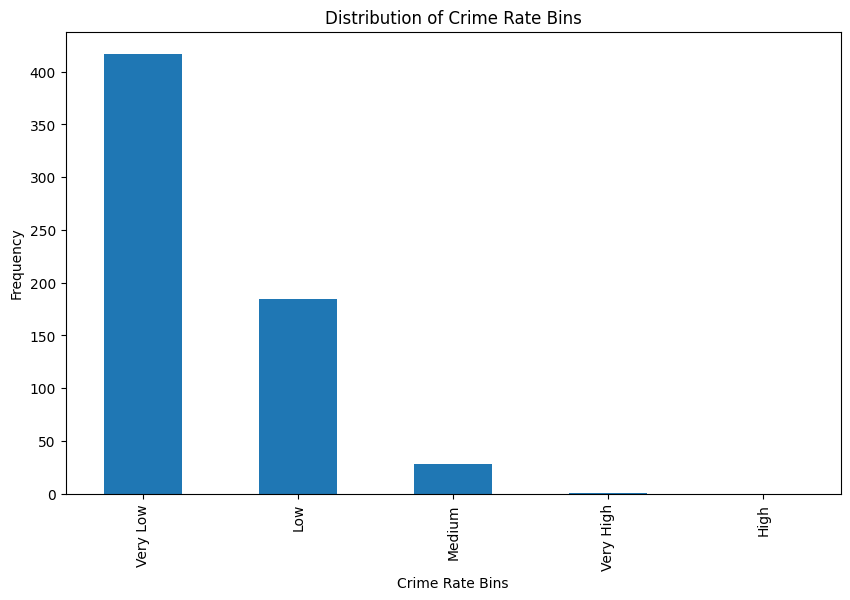

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset
file_path = "https://raw.githubusercontent.com/Triyas27/EDA/main/crimedata.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 1. Data Deduplication
print("\nShape before deduplication:", df.shape)
df_deduped = df.drop_duplicates()
print("Shape after deduplication:", df_deduped.shape)

# 2. Replacing Values
# Replace specific values in a column
df_replaced = df.copy()
df_replaced['crmrte'] = df_replaced['crmrte'].replace(0, np.nan)  # Example: Replace '0' in 'crmrte' with NaN
print("\nCrime rate column after replacing 0 with NaN:")
print(df_replaced[['crmrte']].head())

# Replace NaN values with a specific value
df_replaced.fillna(value={'crmrte': df_replaced['crmrte'].mean()}, inplace=True)
print("\nCrime rate column after replacing NaN with mean value:")
print(df_replaced[['crmrte']].head())

# 3. Discretization and Binning
# Bin 'crmrte' column into categories
df_binned = df.copy()
df_binned['crime_rate_binned'] = pd.cut(df_binned['crmrte'].fillna(df_binned['crmrte'].mean()), bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']) # Fill NaN values with the mean of the column before binning
print("\nBinned 'crmrte' column:")
print(df_binned[['crmrte', 'crime_rate_binned']].head())

# 4. Handling Missing Data - Traditional Method (Maximum Likelihood Estimation)
# Introduce some missing values for demonstration
df_with_na = df.copy()
df_with_na.loc[10:15, 'crmrte'] = np.nan  # Creating missing values in 'crmrte'

# Handle missing data using SimpleImputer (Maximum Likelihood Estimation approximated via mean substitution here)
imputer = SimpleImputer(strategy='mean')
df_with_na['crmrte'] = imputer.fit_transform(df_with_na[['crmrte']])
print("\nCrime rate column after imputing missing values using MLE approximation (mean):")
print(df_with_na[['crmrte']].head(20))

# 5. Discretization with KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
# Impute missing values with the mean of the column before discretization
df['crmrte_binned_kbins'] = kbins.fit_transform(df[['crmrte']].fillna(df['crmrte'].mean()))
print("\nDiscretized 'crmrte' column using KBinsDiscretizer:")
print(df[['crmrte', 'crmrte_binned_kbins']].head())

# 6. Visualizing Binned Data
plt.figure(figsize=(10, 6))
df_binned['crime_rate_binned'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Rate Bins')
plt.xlabel('Crime Rate Bins')
plt.ylabel('Frequency')
plt.show()

# Module 3

Univariate Analysis (Summary Statistics):
         rownames     county        year      crmrte      prbarr     prbconv  \
count  630.000000  630.00000  630.000000  630.000000  630.000000  630.000000   
mean   315.500000  100.60000   84.000000    0.031588    0.307368    0.688618   
std    182.009615   58.03627    2.001589    0.018121    0.171205    1.690345   
min      1.000000    1.00000   81.000000    0.001812    0.058824    0.068376   
25%    158.250000   51.00000   82.000000    0.018352    0.217902    0.347692   
50%    315.500000  103.00000   84.000000    0.028441    0.278240    0.474375   
75%    472.750000  151.00000   86.000000    0.038406    0.352518    0.635597   
max    630.000000  197.00000   87.000000    0.163835    2.750000   37.000000   

          prbpris      avgsen       polpc     density  ...       lwfir  \
count  630.000000  630.000000  630.000000  630.000000  ...  630.000000   
mean     0.425518    8.954540    0.001917    1.386062  ...    5.579433   
std      0.0872

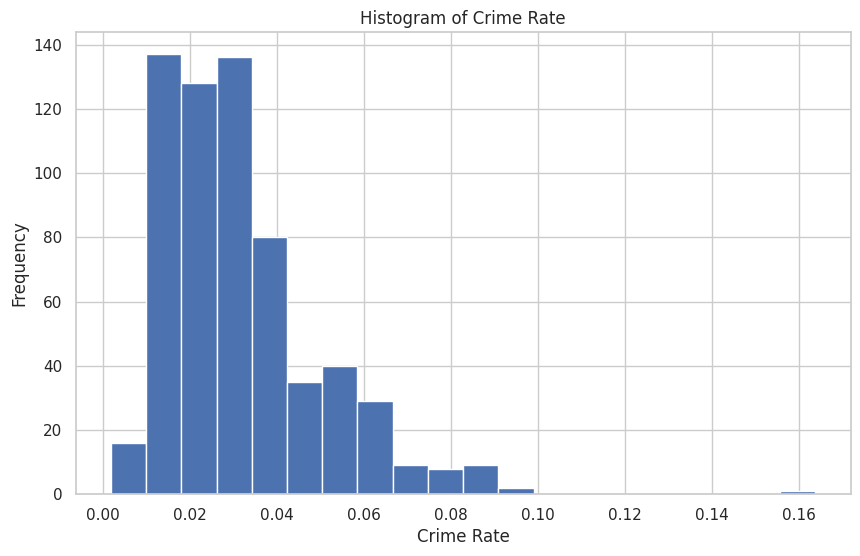


Bivariate Analysis (Correlation Matrix):
          rownames        county          year    crmrte    prbarr   prbconv  \
rownames  1.000000  9.994803e-01  1.099716e-02  0.037209 -0.020628  0.119920   
county    0.999480  1.000000e+00  2.479813e-14  0.041679 -0.018569  0.118875   
year      0.010997  2.479813e-14  1.000000e+00  0.002392 -0.028067  0.006527   
crmrte    0.037209  4.167863e-02  2.392457e-03  1.000000 -0.358553 -0.113033   
prbarr   -0.020628 -1.856917e-02 -2.806708e-02 -0.358553  1.000000  0.035569   
prbconv   0.119920  1.188753e-01  6.527245e-03 -0.113033  0.035569  1.000000   
prbpris  -0.024187 -2.486140e-02 -9.608535e-02  0.135537 -0.074893 -0.037340   
avgsen    0.049026  5.053367e-02 -7.525718e-02  0.032416  0.034031  0.015305   
polpc     0.122540  1.237755e-01  2.536452e-02  0.184826  0.290581  0.449635   
density  -0.026558 -2.580562e-02  2.347055e-02  0.694072 -0.271228 -0.115555   
taxpc    -0.058097 -6.176276e-02  4.263984e-01  0.230685 -0.041217  0.006733  

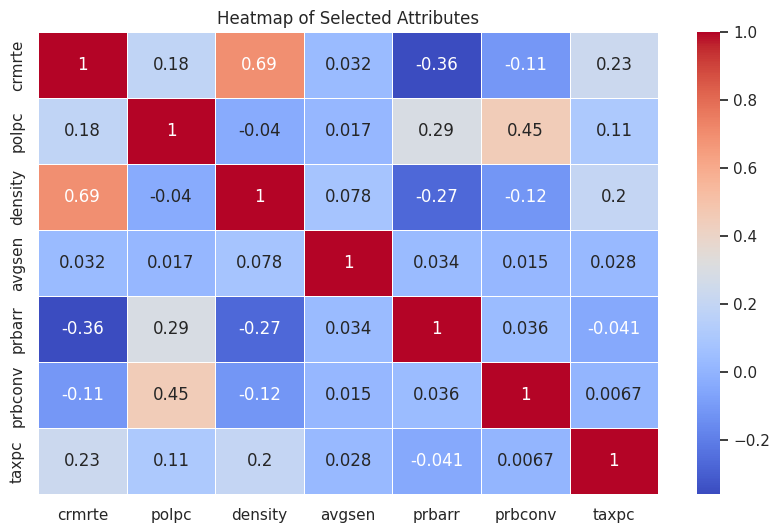

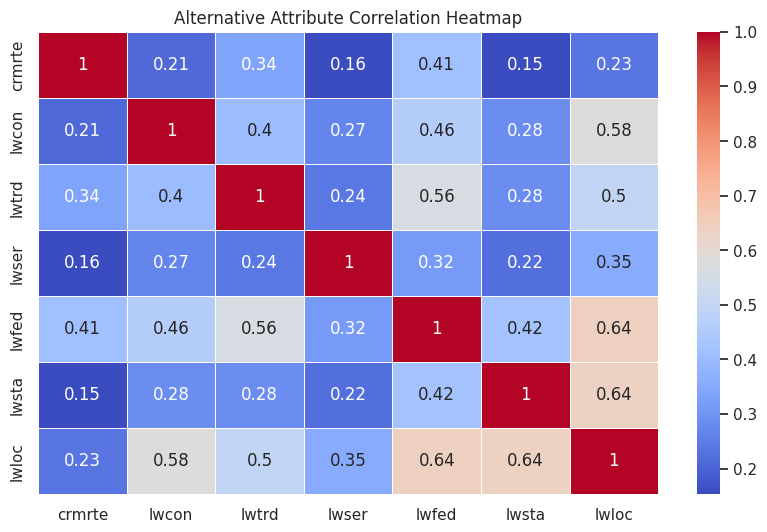

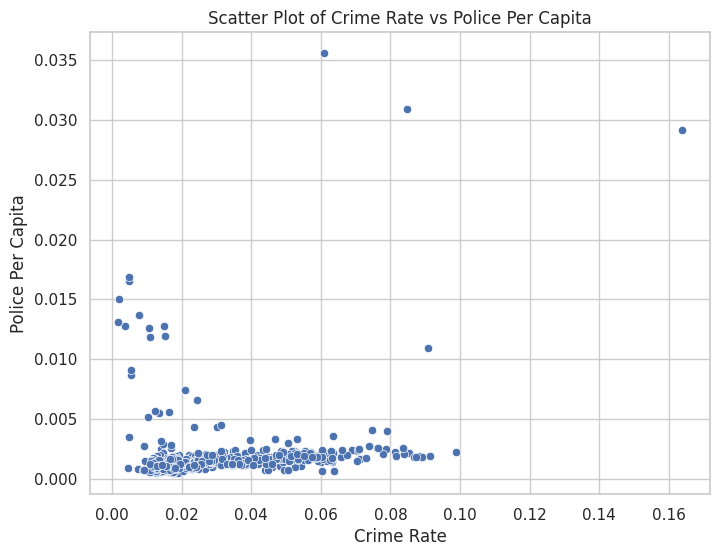


Multivariate Analysis (Pairplot):


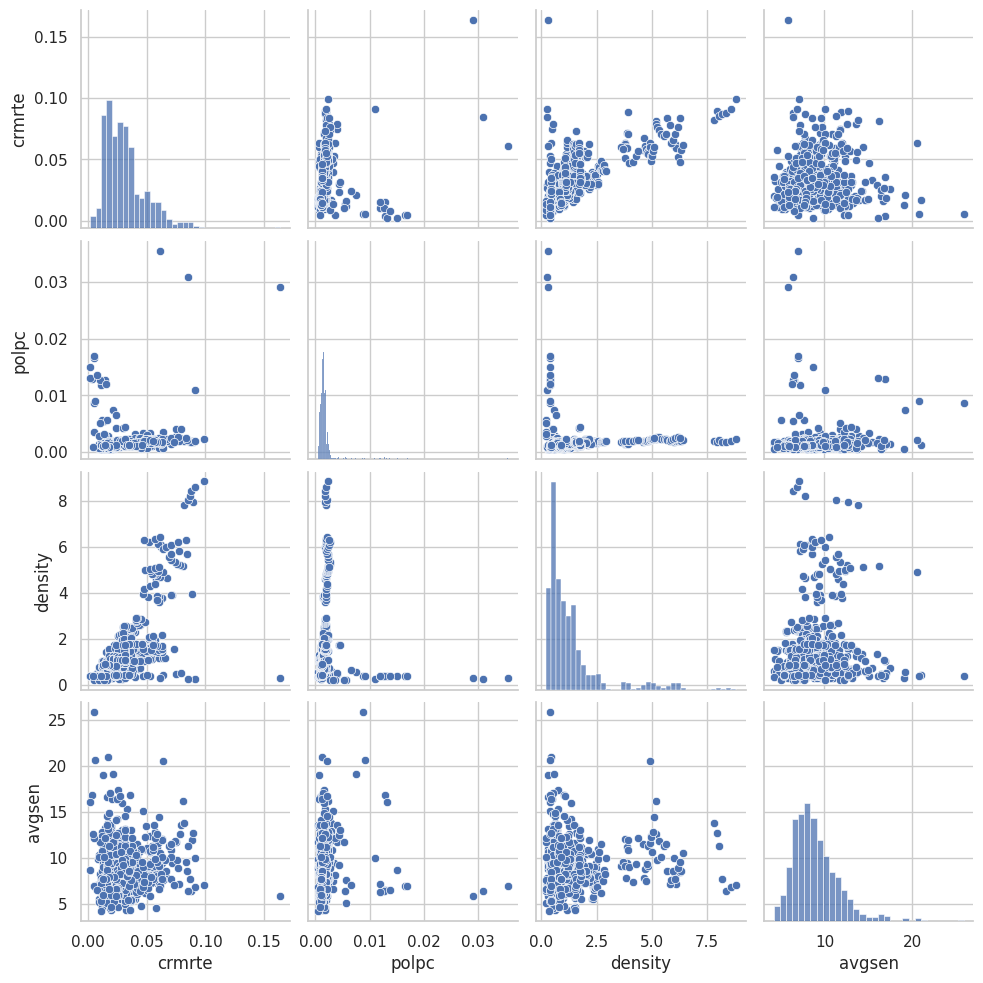


Dataset with time-based index:
            rownames  county    crmrte    prbarr   prbconv   prbpris  avgsen  \
year                                                                           
1981-01-01         1       1  0.039885  0.289696  0.402062  0.472222    5.61   
1982-01-01         2       1  0.038345  0.338111  0.433005  0.506993    5.59   
1983-01-01         3       1  0.030305  0.330449  0.525703  0.479705    5.80   
1984-01-01         4       1  0.034726  0.362525  0.604706  0.520104    6.89   
1985-01-01         5       1  0.036573  0.325395  0.578723  0.497059    6.55   

               polpc   density     taxpc  ...     lwfir     lwser     lwmfg  \
year                                      ...                                 
1981-01-01  0.001787  2.307159  25.69763  ...  5.607452  5.374044  5.434246   
1982-01-01  0.001767  2.330254  24.87425  ...  5.706707  5.444911  5.482013   
1983-01-01  0.001836  2.341801  26.45144  ...  5.736475  5.481292  5.597310   
1984-01-01  

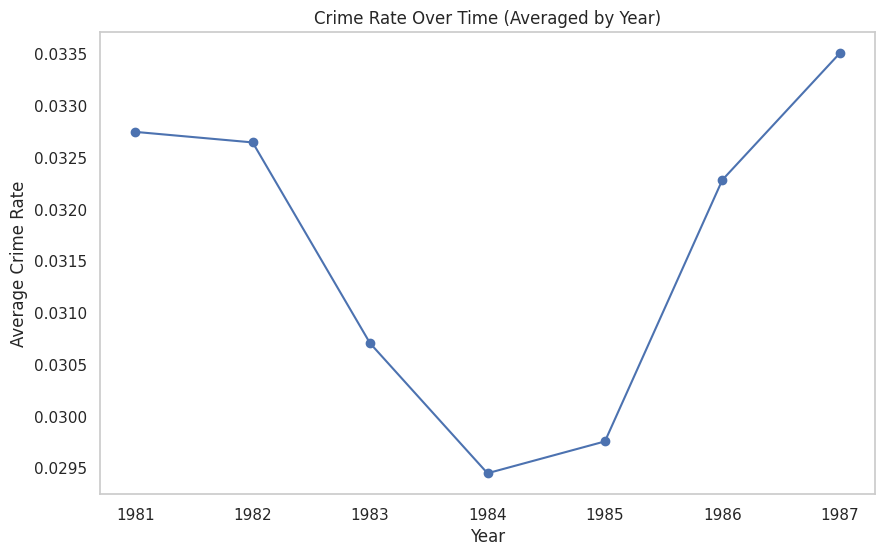

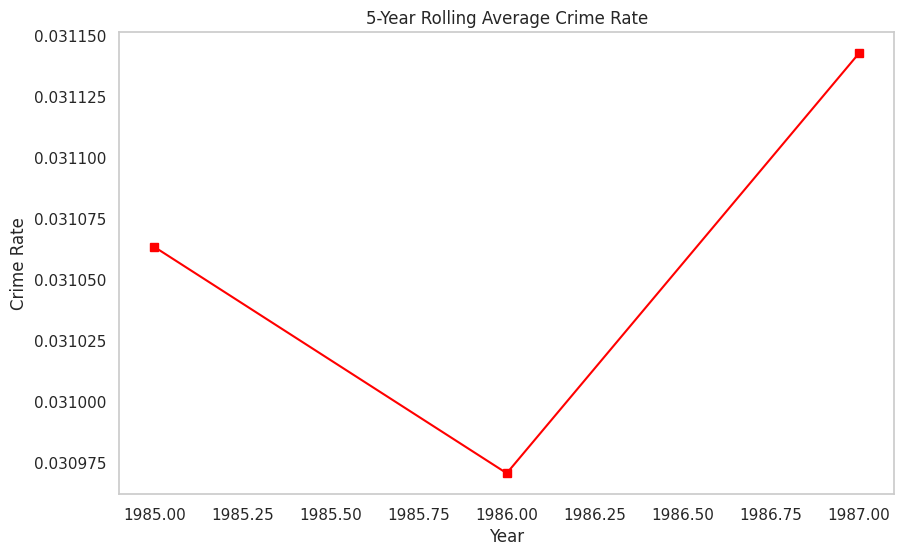

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "https://raw.githubusercontent.com/Triyas27/EDA/main/crimedata.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 1.Univariate Analysis
print("Univariate Analysis (Summary Statistics):")
print(df.describe())

# Visualizing Univariate Data (Histograms for Numerical Features)
plt.figure(figsize=(10, 6))
df['crmrte'].hist(bins=20)
plt.title('Histogram of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

# 2.Bivariate Analysis
print("\nBivariate Analysis (Correlation Matrix):")
# Select only numerical columns for correlation calculation
correlation_matrix = df.select_dtypes(include=np.number).corr()
print(correlation_matrix)

# Heatmap of Correlation Matrix
selected_attributes = ['crmrte', 'polpc', 'density', 'avgsen', 'prbarr', 'prbconv', 'taxpc']
filtered_corr_matrix = df[selected_attributes].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Selected Attributes')
plt.show()

# Different Attribute Selection
alternative_attributes = ['crmrte', 'lwcon', 'lwtrd', 'lwser', 'lwfed', 'lwsta', 'lwloc']
alternative_corr_matrix = df[alternative_attributes].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(alternative_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Alternative Attribute Correlation Heatmap')
plt.show()

# Scatter Plot for Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='crmrte', y='polpc', data=df)
plt.title('Scatter Plot of Crime Rate vs Police Per Capita')
plt.xlabel('Crime Rate')
plt.ylabel('Police Per Capita')
plt.show()

# 3. Multivariate Analysis
print("\nMultivariate Analysis (Pairplot):")
multivariate_columns = ['crmrte', 'polpc', 'density', 'avgsen']
existing_columns = [col for col in multivariate_columns if col in df.columns]

if len(existing_columns) >= 2:
    sns.pairplot(df[existing_columns])
    plt.show()
else:
    print("\nNot enough numerical columns available for pairplot.")

# 4. Time Series Analysis (TSA)
# Convert 'year' column to datetime if available
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce') + 1900  # Adjust for 2-digit year format
    df['year'] = pd.to_datetime(df['year'], format='%Y')
    df.set_index('year', inplace=True)
    print("\nDataset with time-based index:")
    print(df.head())

    # Aggregate crime rate by year using mean
    yearly_crime = df.groupby(df.index.year)['crmrte'].mean()

    # Visualizing Time Series Data
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_crime, marker='o', linestyle='-')
    plt.title('Crime Rate Over Time (Averaged by Year)')
    plt.xlabel('Year')
    plt.ylabel('Average Crime Rate')
    plt.grid()
    plt.show()

    # Resampling Time Series Data (5-Year Rolling Mean for Smoother Trends)
    five_year_crime = yearly_crime.rolling(window=5).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(five_year_crime, marker='s', linestyle='-', color='red')
    plt.title('5-Year Rolling Average Crime Rate')
    plt.xlabel('Year')
    plt.ylabel('Crime Rate')
    plt.grid()
    plt.show()
else:
    print("\nYear column not found, skipping time-series analysis.")

# Module 4

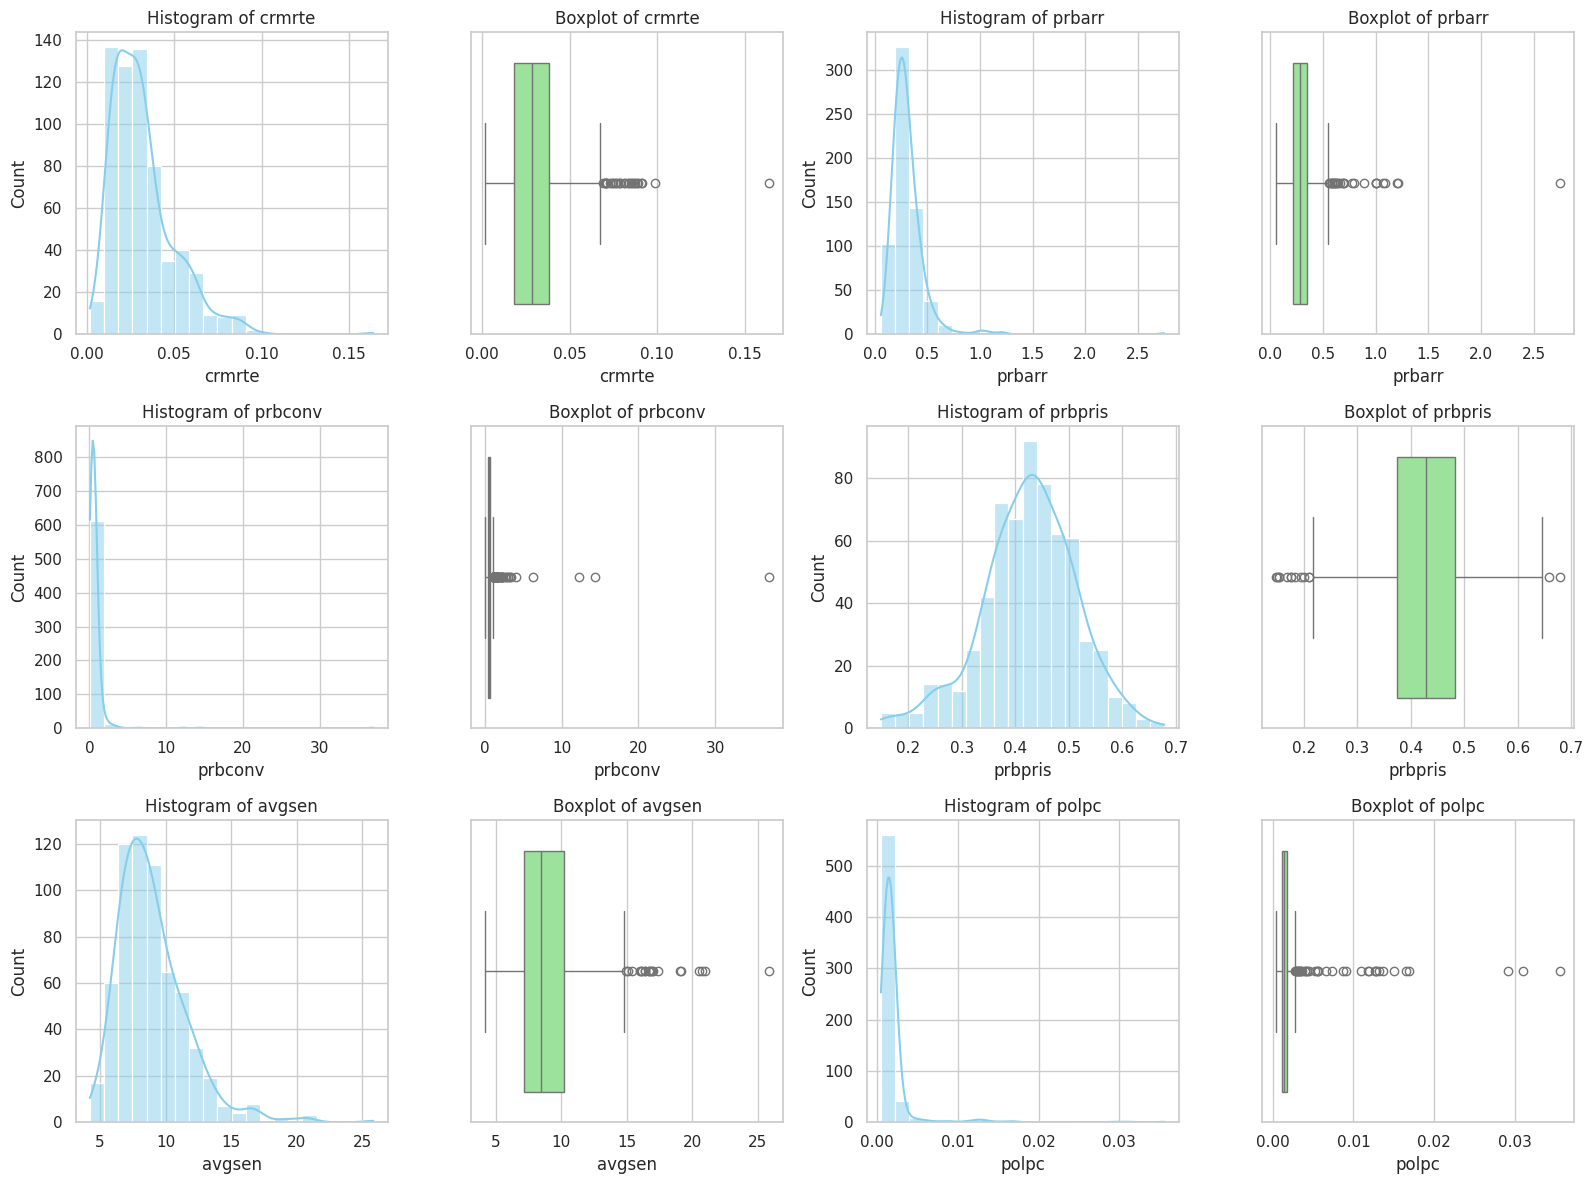

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#1D ANALYSIS

# Set plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Select a few numeric variables for 1-D analysis
columns_to_plot = ['crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen', 'polpc']

# Create histograms and boxplots
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 4, 2 * i + 1)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f'Histogram of {col}')

    plt.subplot(3, 4, 2 * i + 2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


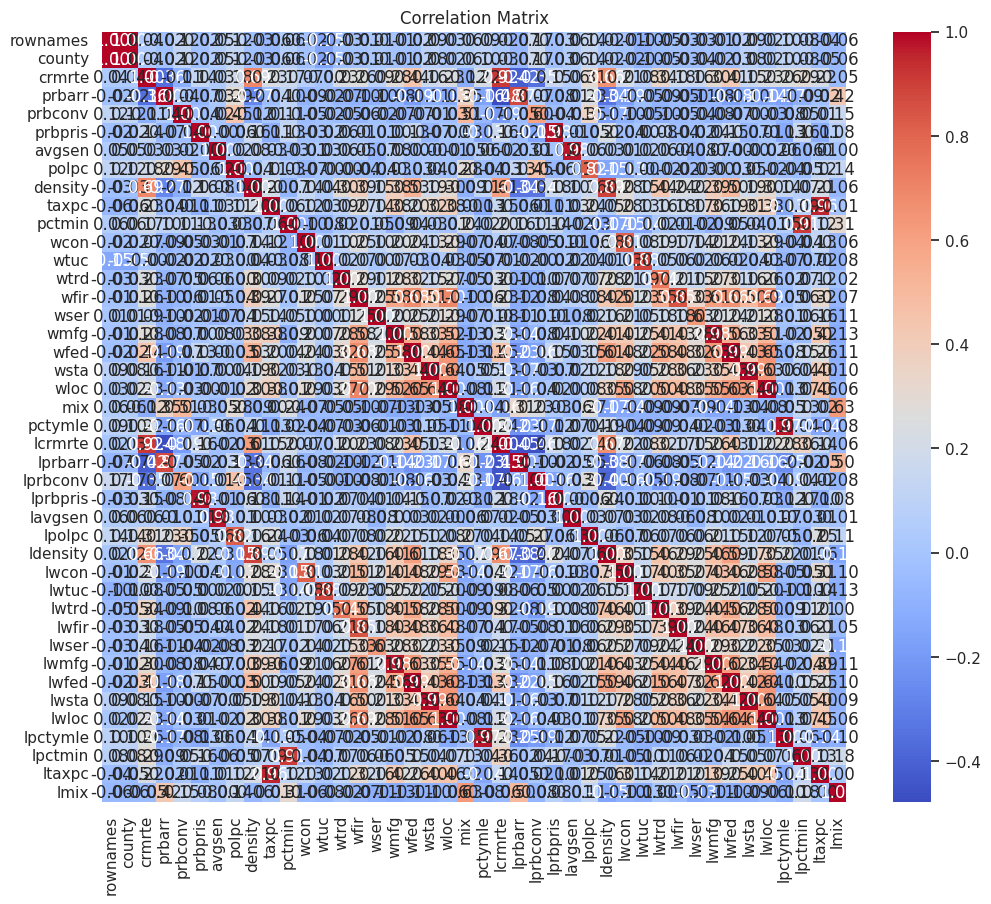

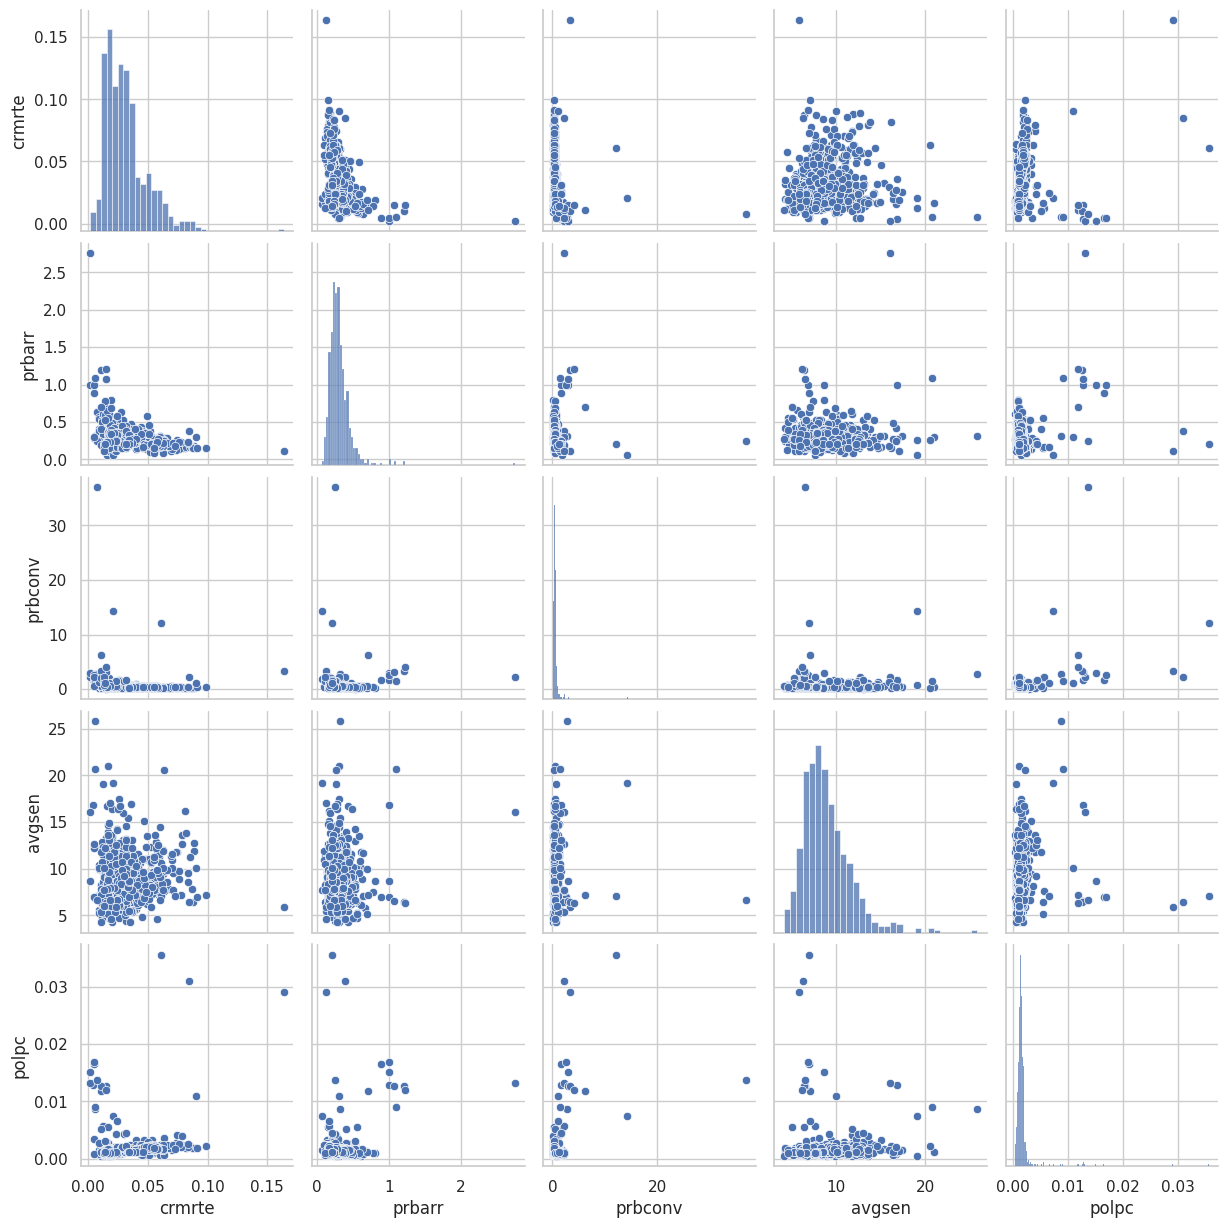

arrest_level  Low  Medium  High
crime_level                    
Low            54      54   102
Medium         44      83    83
High          112      73    25


In [6]:
#2D ANALYSIS

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[['crmrte', 'prbarr', 'prbconv', 'avgsen', 'polpc']])
plt.show()
df['crime_level'] = pd.qcut(df['crmrte'], q=3, labels=['Low', 'Medium', 'High'])

# Cross-tabulation with another variable (e.g., arrest probability binned)
df['arrest_level'] = pd.qcut(df['prbarr'], q=3, labels=['Low', 'Medium', 'High'])

contingency_table = pd.crosstab(df['crime_level'], df['arrest_level'])
print(contingency_table)

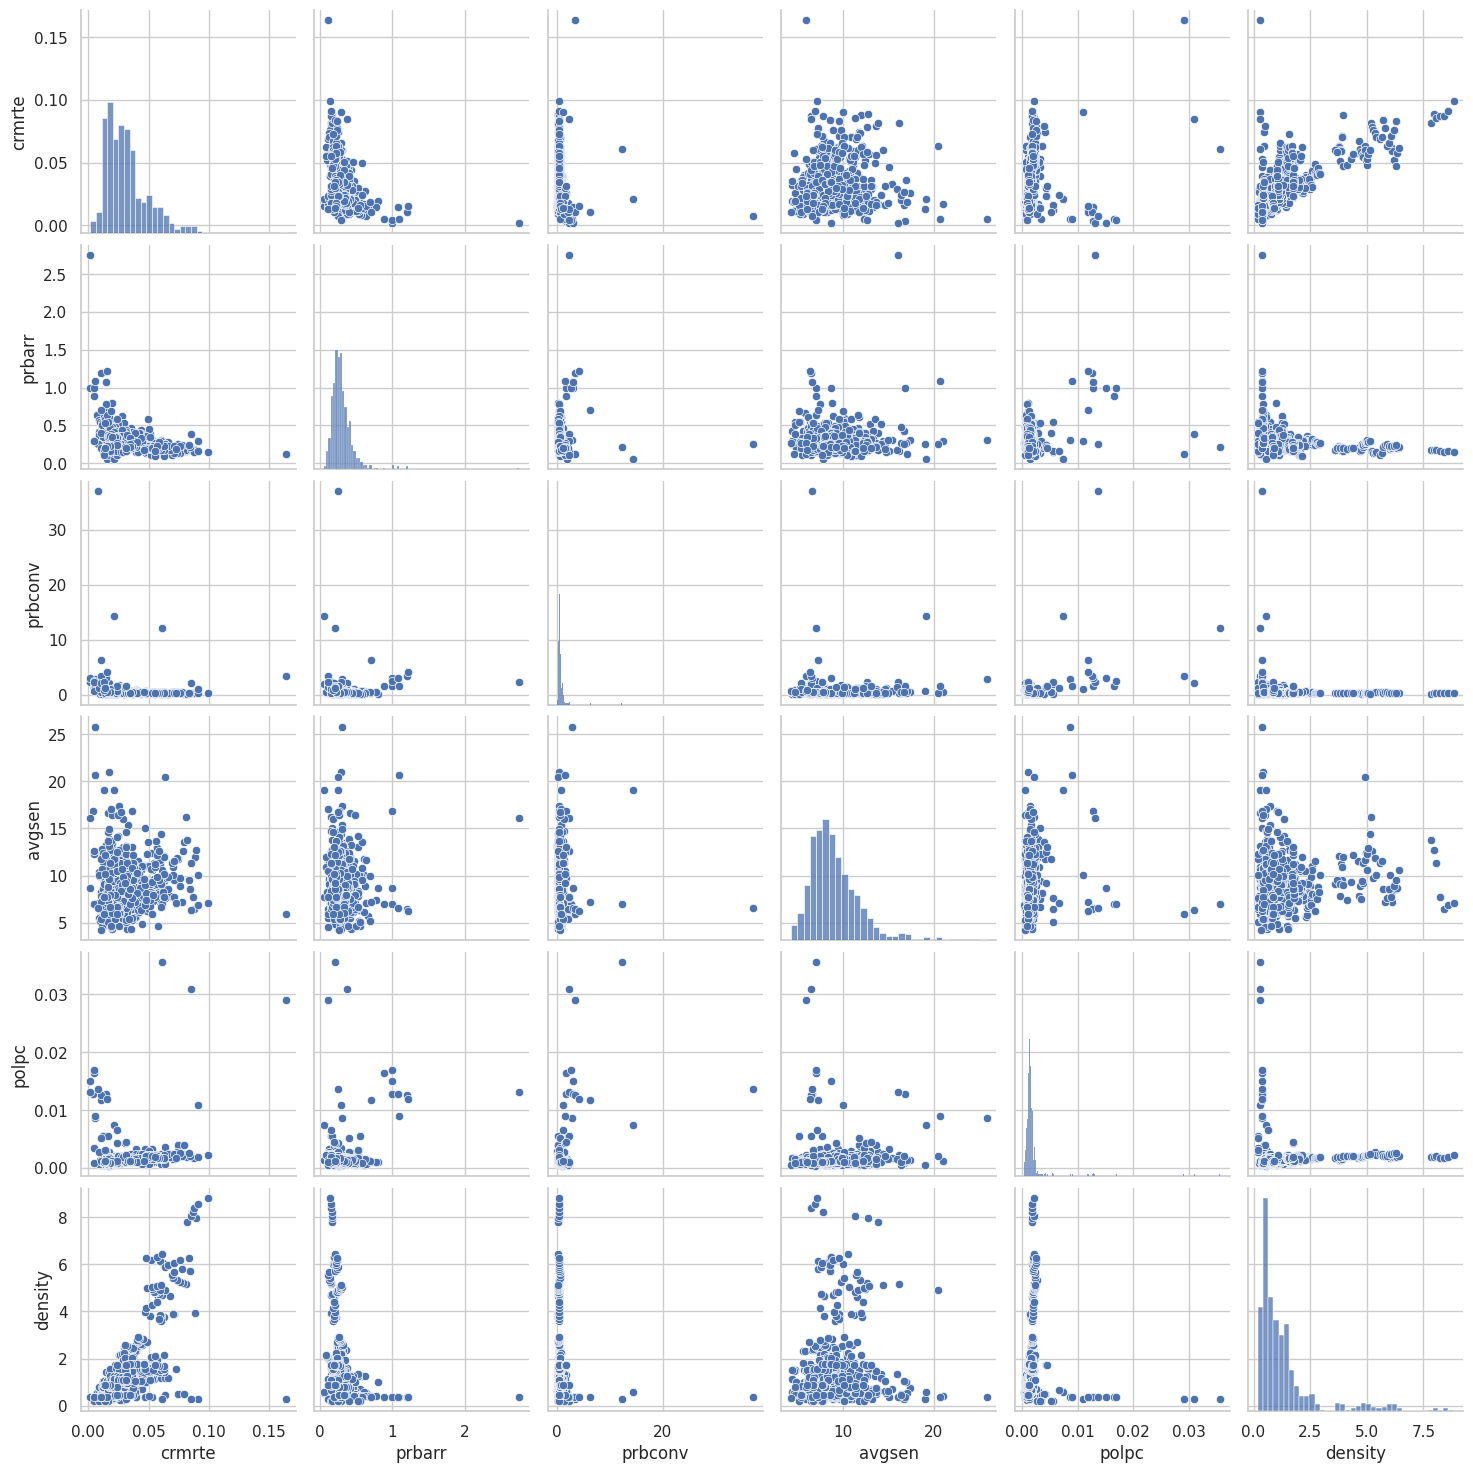

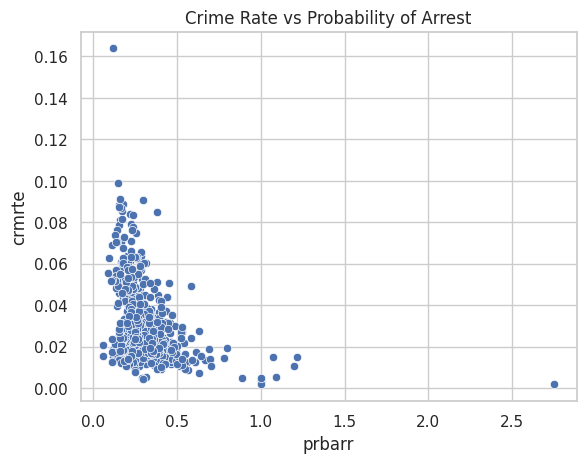

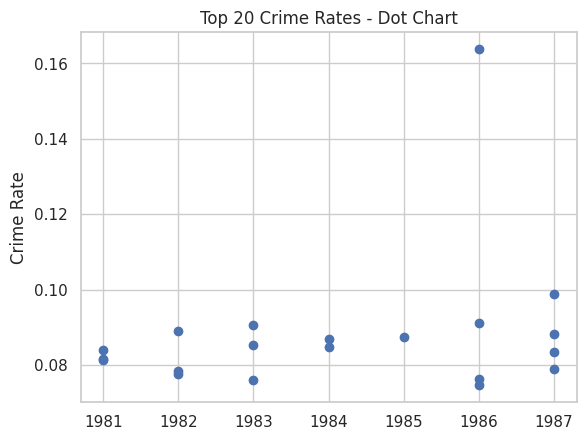

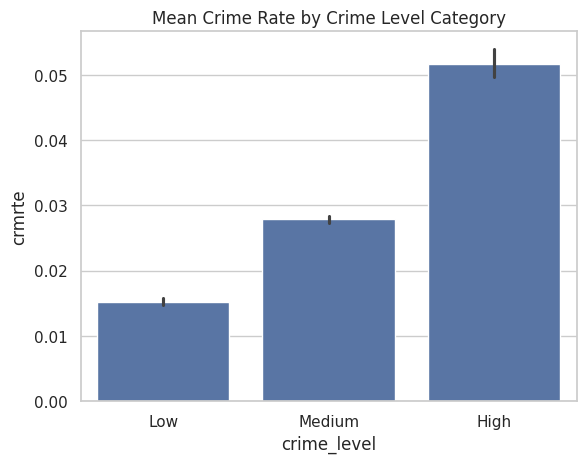

In [7]:
#ND ANALYSIS

sns.pairplot(df[['crmrte', 'prbarr', 'prbconv', 'avgsen', 'polpc', 'density']])
plt.show()
sns.scatterplot(data=df, x='prbarr', y='crmrte')
plt.title("Crime Rate vs Probability of Arrest")
plt.show()
df_sorted = df.sort_values(by='crmrte', ascending=False).head(20)
plt.plot(df_sorted['crmrte'], 'o')
plt.title("Top 20 Crime Rates - Dot Chart")
plt.ylabel('Crime Rate')
plt.show()
sns.barplot(data=df, x='crime_level', y='crmrte')
plt.title("Mean Crime Rate by Crime Level Category")
plt.show()

# Module 5

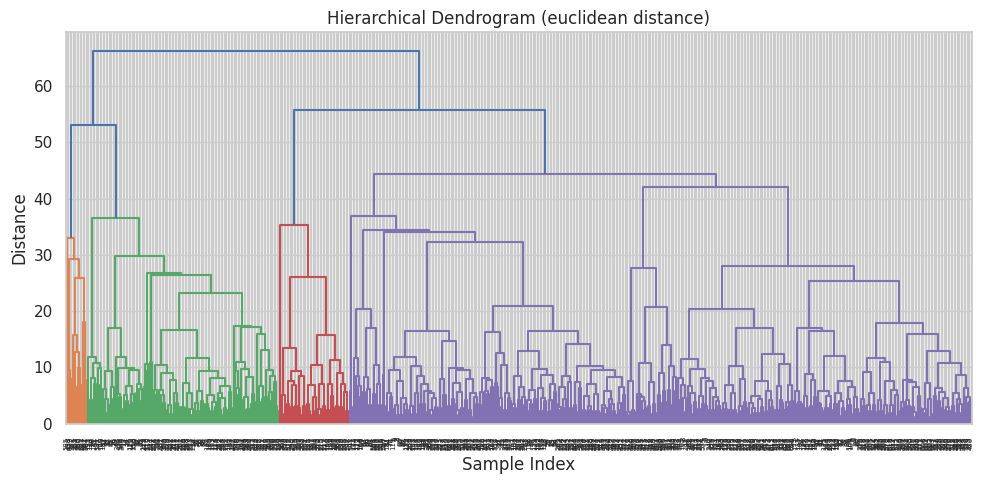

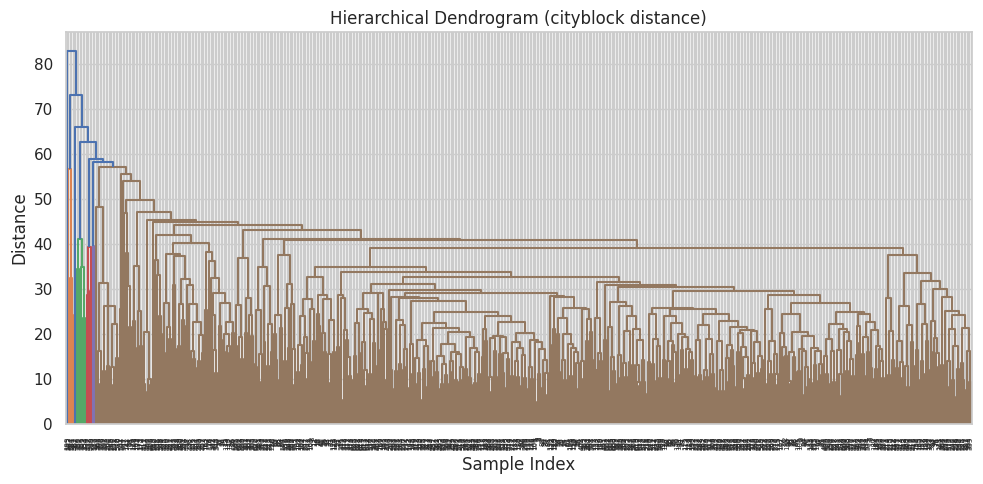

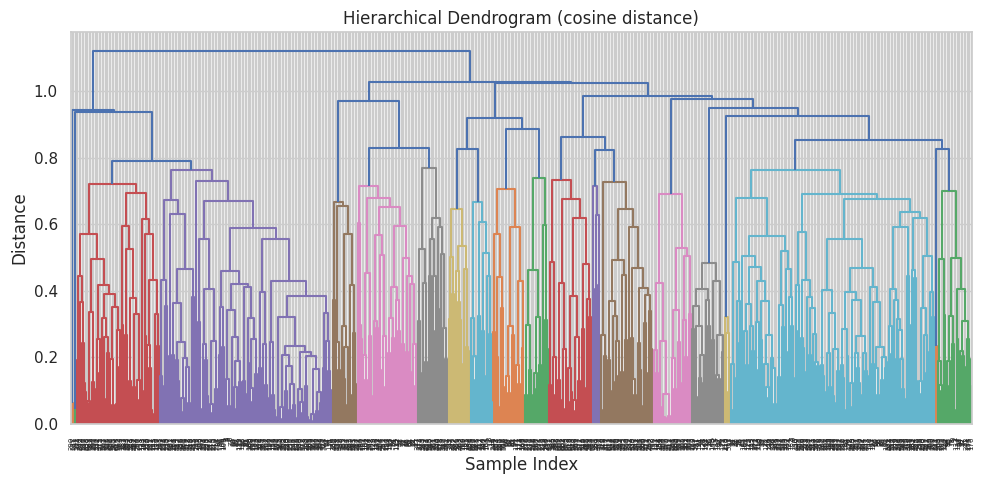

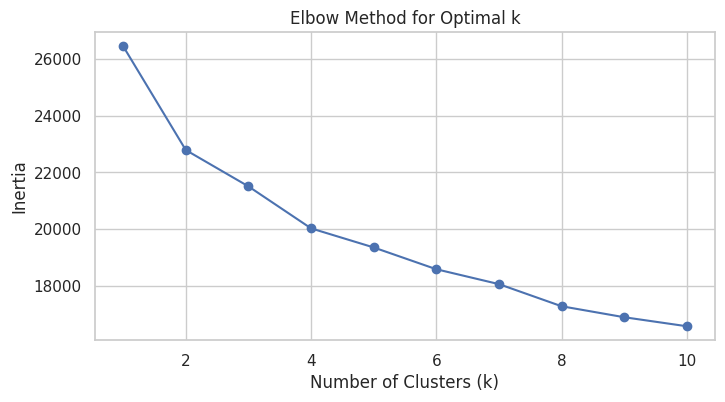

              crmrte    prbarr  avgsen  distance_from_center
year                                                        
1984-01-01  0.073959  0.128980   11.82             25.122930
1985-01-01  0.007812  0.250000    6.58             22.356699
1987-01-01  0.010870  0.195266    5.38             20.396453
1985-01-01  0.012035  0.206897    8.59             19.486960
1984-01-01  0.017123  0.391257    7.50             17.517698
1986-01-01  0.020975  0.166014    8.20             16.745119
1983-01-01  0.010537  1.200000    6.40             15.914603
1984-01-01  0.033660  0.316285    7.15             14.502483
1983-01-01  0.001812  2.750000   16.07             13.740458
1983-01-01  0.016894  0.300300   20.98             13.607599


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist


# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
X_numerical = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# -------------------- 2. Hierarchical Clustering --------------------
distance_metrics = ['euclidean', 'cityblock', 'cosine']

for metric in distance_metrics:
    plt.figure(figsize=(10, 5))
    # Use 'ward' only with euclidean, fallback to 'average' for others
    method = 'ward' if metric == 'euclidean' else 'average'
    linkage_matrix = linkage(X_scaled, method=method, metric=metric)

    dendrogram(linkage_matrix)
    plt.title(f'Hierarchical Dendrogram ({metric} distance)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

# -------------------- 3. K-Means Clustering --------------------
# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Apply KMeans with optimal k (choose based on elbow)
optimal_k = 4  # Change this based on your elbow result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# -------------------- 4. Outlier Detection --------------------
# Compute distance to cluster centers
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[df['cluster']], axis=1)
df['distance_from_center'] = distances

# Identify outliers (top 5% farthest from cluster centers)
threshold = np.percentile(distances, 95)
df['is_outlier'] = df['distance_from_center'] > threshold

# Show top 10 outliers
outliers = df[df['is_outlier']].sort_values(by='distance_from_center', ascending=False)
print(outliers[['crmrte', 'prbarr', 'avgsen', 'distance_from_center']].head(10))


# Module 6

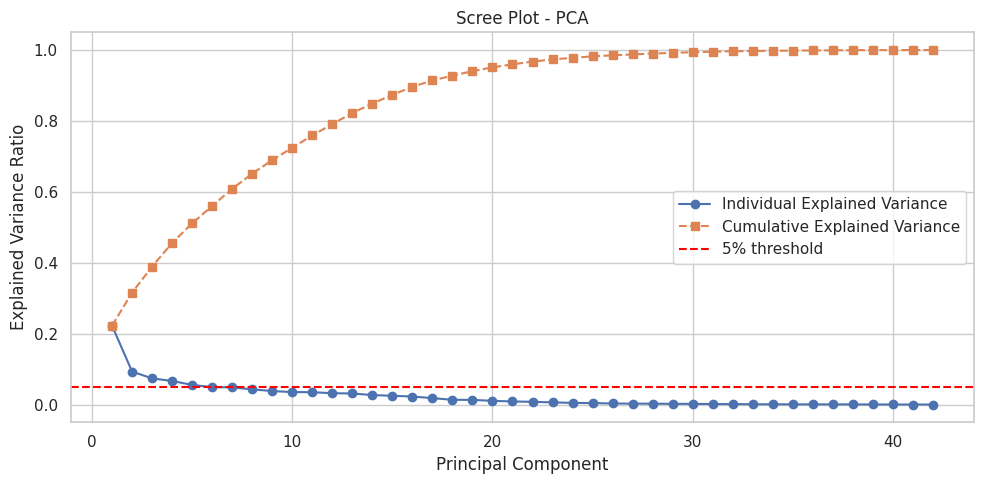

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# -------------------- Scree Plot --------------------
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's--', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - PCA')
plt.axhline(y=0.05, color='red', linestyle='--', label='5% threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Module 7

Mean Absolute Error (MAE): 0.0033
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0046
R² Score (Coefficient of Determination): 0.9235


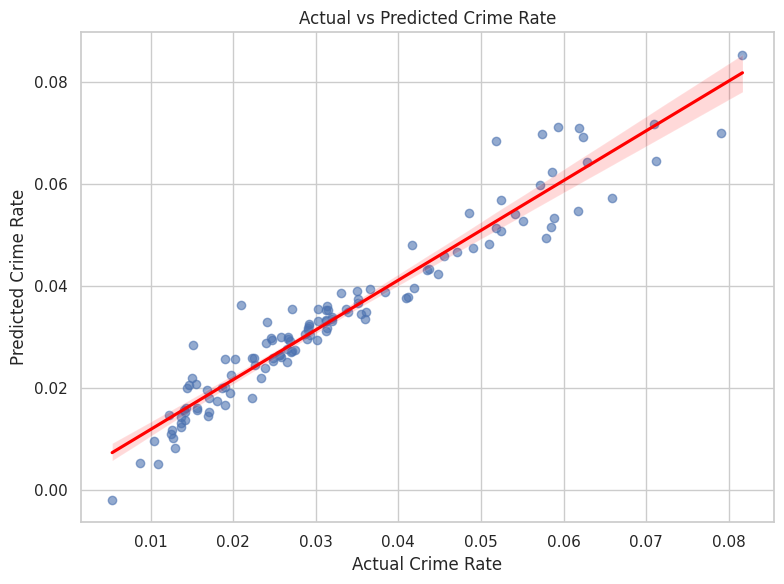

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Drop non-numeric or identifier columns
X = df.select_dtypes(include=['float64', 'int64'])
# Check if the columns exist before dropping
columns_to_drop = ['rownames', 'county', 'year', 'crmrte']
existing_columns = [col for col in columns_to_drop if col in X.columns]
X = X.drop(columns=existing_columns)  # Features
y = df['crmrte']  # Target variable (Crime rate)
# -------------------- 2. Train-Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- 3. Linear Regression Model --------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# -------------------- 4. Evaluation --------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display Results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Actual', y='Predicted', data=results_df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Crime Rate')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.grid(True)
plt.tight_layout()
plt.show()